In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv(r'C:\Users\KOTHA SAI\Desktop\lk\Advanced-House-Price-Prediction--master\train.csv')

In [ ]:
dataset.head()

In [ ]:
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum() >1]

In [ ]:
for feature in features_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),"##nana values")

In [ ]:
for feature in features_nan:
    data=dataset.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']

In [ ]:
dataset[num_features].head()

In [ ]:
for feature in numerical_features:
    print(feature,dataset[feature].unique())

In [ ]:
temp_features=[feature for feature in num_features if 'Yr' in feature or 'Year' in feature]

In [ ]:
temp_features

In [ ]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.title(feature)
plt.xlabel('yrsold')
plt.ylabel('saleprice')
plt.show()

In [ ]:
for feature in temp_features:
    
    data=dataset.copy()
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data[feature],data['SalePrice'])
    plt.show()

In [ ]:
dis_feat=[feature for feature in num_features if len(dataset[feature].unique())<25 and feature not in temp_features+['Id']]

In [ ]:
for feature in dis_feat:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
feature_continous=[feature for feature in num_features if feature not in dis_feat+temp_features+['Id']]

In [ ]:
feature_continous

In [ ]:
for feature in feature_continous:
    data=dataset.copy()
    data[feature].hist(bins=30)
    plt.title(feature)
    plt.show()

In [ ]:
##logarithimic distribution
for feature in feature_continous:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()
        
        
    
    
    

In [ ]:
##logarithimic distribution
for feature in feature_continous:
    data=dataset.copy()
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.title(feature)
    plt.show()
            
  
        
    
    
    

In [ ]:
for feature in feature_continous:
    data=dataset.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()

####categeorical variables 
###feature engineering


In [ ]:
categeory_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

In [ ]:
categeory_features

In [ ]:
for feature in categeory_features:
    print(feature,len(dataset[feature].unique()))

In [ ]:
dataset[categeory_features].head()

In [ ]:
for feature in categeory_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()
    
    
    
    
    


In [ ]:
for feature in categeory_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


###feature engineering for cateogirical variables

In [ ]:
categeorical_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum() >1 and dataset[feature].dtypes=='O']

In [ ]:
for feature in categeorical_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4))

In [ ]:
for feature in categeorical_nan:
    dataset[feature]=dataset[feature].fillna('missing')
    print(dataset[feature])
    
    
    

In [ ]:
dataset[categeorical_nan].isnull().sum()

In [ ]:
dataset.head()

In [ ]:
numerical_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

In [ ]:
dataset[numerical_nan]

In [ ]:
for feature in numerical_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4))

In [ ]:
for feature in numerical_nan:
    median=dataset[feature].median()
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median,inplace=True)


In [ ]:
dataset.head(30)

#### temperary variables (year variables)

In [ ]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]


In [ ]:
dataset.head()

In [ ]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

In [ ]:
dataset.head()

In [ ]:
num_features1=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_features1:
    dataset[feature]=np.log(dataset[feature])
    

In [ ]:
categeorical_features1=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

In [ ]:
for feature in categeorical_features1:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    

In [ ]:
dataset.head(10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
for feature in categeorical_features1:
    dataset[feature]=encoder.fit_transform(dataset[feature])

In [ ]:
dataset.head()

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])


In [ ]:
scaler.transform(dataset[feature_scale])

In [ ]:
data=pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)

In [ ]:
data.to_csv('train_after.csv')

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
y=dataset['SalePrice']

In [ ]:
x=dataset.drop(['Id','SalePrice'],axis=1)

In [ ]:
feature_select_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [ ]:
feature_select_model.fit(x,y)

In [157]:
feature_select_model.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False])

In [159]:
selected=x.columns[feature_select_model.get_support()]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 41 but corresponding boolean dimension is 82

In [160]:
x=x[selected]

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
regressor=RandomForestRegressor(n_estimators=30)

In [165]:
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=30)

In [166]:
y_pred=regressor.predict(x_test)

In [169]:
from sklearn.metrics import r2_score

In [170]:
print(r2_score(y_test,y_pred))

0.8653681314628383


In [198]:
from sklearn.linear_model import LinearRegression

In [172]:
regressor1=LinearRegression()

In [173]:
regressor1.fit(x_train,y_train)

LinearRegression()

In [174]:
y_pred1=regressor.predict(x_train)

In [175]:
print(r2_score(y_train,y_pred1))

0.9768886965461914


In [176]:
from sklearn.tree import DecisionTreeRegressor

In [177]:
regressor3=DecisionTreeRegressor(random_state=0)

In [178]:
regressor3.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [179]:
y_pred3=regressor3.predict(x_test)

In [180]:
print(r2_score(y_test,y_pred3))

0.756884845144984


In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
mean=cross_val_score(regressor,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [195]:
test=pd.read_csv(r'C:\Users\KOTHA SAI\Desktop\lk\Advanced-House-Price-Prediction--master\Advanced-House-Price-Prediction--master\test.csv')

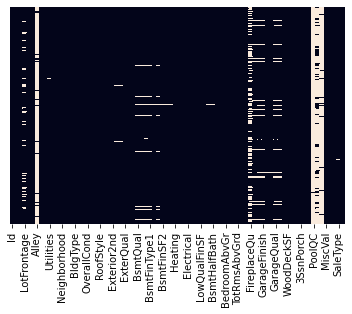

In [196]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [199]:
import xgboost
classifier=xgboost.XGBRegressor()

ModuleNotFoundError: No module named 'xgboost'